<a href="https://colab.research.google.com/github/vanilsongomes/Pratical/blob/master/Modelo_Covid19_Breves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACULDADE DE MATEMÁTICA - UFPA/CUMB**
## MODELOS PARA PREVISÃO DO COVID-19 EM BRREVES -PA
## MACHINE LEARNING 
## 1 - *Support Vector Machine (SVM)*
## 2 - *Polinomial Regression (PR)* 
## 3 - *Baeysian Ridge Regression (BRR)*

In [ ]:
# importa bibliotecas para o projeto
import numpy as np 
# bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

import pandas as pd ## bibliotecas para preparação dos dataset
import random
import math
import time
####Bibliotecas para aprendizado de máquina (regressão) - scikit learn
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
##########################################################################
import datetime
#import operator
# template para gráfico 
plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#A função abaixo serve para fixar a semente de geração de números aleatórios, 
#dessa forma os resultados são repetíveis. Essa é uma boa prática.
np.random.seed(5)

In [ ]:
df_breves=pd.read_excel('/content/v4Dados_Breves_COVID19.xlsx')


In [ ]:
df_breves.head()

,Dia,NovosCasos,Confirmados,Óbitos,Recuperados,Descartados,Análise
0,2020-04-02,0,0,0,0,0,1
1,2020-04-03,0,0,0,0,0,1
2,2020-04-04,0,0,0,0,0,1
3,2020-04-05,0,0,0,0,0,1
4,2020-04-06,0,0,0,0,0,1


In [ ]:
df_breves.tail()

,Dia,NovosCasos,Confirmados,Óbitos,Recuperados,Descartados,Análise
82,2020-06-23,75,1090,72,737,695,3
83,2020-06-24,35,1125,72,779,710,6
84,2020-06-25,33,1158,73,811,721,6
85,2020-06-26,20,1178,73,826,736,3
86,2020-06-27,16,1194,73,847,748,3


In [ ]:
# confirmados, óbitos, recuperados, e casos ativos
  
x_confirmado = df_breves.groupby("Dia")["Confirmados"].sum().index
y_confirmado = df_breves.groupby("Dia")["Confirmados"].sum().values
x_obito = df_breves.groupby("Dia")["Óbitos"].sum().index
y_obito = df_breves.groupby("Dia")["Óbitos"].sum().values
x_Recuperados = df_breves.groupby("Dia")["Recuperados"].sum().index
y_Recuperados = df_breves.groupby("Dia")["Recuperados"].sum().values
total_ativo = (y_confirmado-y_obito-y_Recuperados)


In [ ]:
# define o tamanho do vetor e transforma em matriz
y = np.array(y_confirmado).reshape(-1,1)
x = np.arange(len(x_confirmado)).reshape(-1,1)



In [ ]:
# Separa a base entre treino e teste de forma aleatória
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)

In [ ]:
# define um vetor com dados e acrescenta dias para previsão
future_forecast = np.arange(len(x_confirmado) + 10).reshape(-1,1)

In [ ]:
#onfirmado = svm_search.best_estimator_
svm_confirmado = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=1)
svm_confirmado.fit(X_train, y_train)
svm_pred = svm_confirmado.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine - Regression
MAE(Mean Absolute Error): 339.09261377888146
MSE(Mean Squared Error): 138172.8058495591


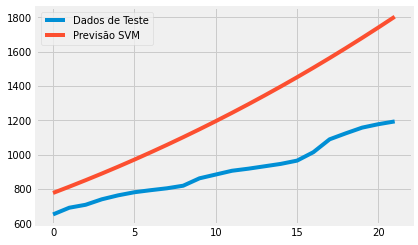

In [ ]:
# check os dados de testes
svm_test_pred = svm_confirmado.predict(X_test)
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(['Dados de Teste', 'Previsão SVM'])
print('Support Vector Machine - Regression')
print('MAE(Mean Absolute Error):', mean_absolute_error(svm_test_pred, y_test))
print('MSE(Mean Squared Error):',mean_squared_error(svm_test_pred, y_test))


In [ ]:
# transformar nossos dados para regressão polinomial
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmado = poly.fit_transform(X_train)
poly_X_test_confirmado = poly.fit_transform(X_test)
poly_future_forecast = poly.fit_transform(future_forecast)

# transformar nossos dados para regressão bayesian
bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train_confirmado = bayesian_poly.fit_transform(X_train)
bayesian_poly_X_test_confirmado = bayesian_poly.fit_transform(X_test)
bayesian_poly_future_forecast = bayesian_poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_X_train_confirmado, y_train)
test_linear_pred = linear_model.predict(poly_X_test_confirmado)
linear_pred = linear_model.predict(poly_future_forecast)
print('Polynomial Regression')
print('MAE(Mean Absolute Error):', mean_absolute_error(test_linear_pred, y_test))
print('MSE(Mean Squared Error):',mean_squared_error(test_linear_pred, y_test))

Polynomial Regression
MAE(Mean Absolute Error): 264.9625947088488
MSE(Mean Squared Error): 96829.09696648784


In [ ]:
print(linear_model.coef_)

[[ 0.00000000e+00 -1.36517631e+01  6.80276941e-01 -5.18602398e-03]]


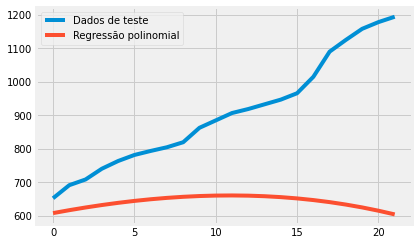

In [ ]:
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend(['Dados de teste', 'Regressão polinomial'])

In [ ]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmado, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                   

In [ ]:
bayesian_search.best_params_

{'alpha_1': 0.001,
 'alpha_2': 1e-05,
 'lambda_1': 1e-07,
 'lambda_2': 1e-05,
 'normalize': True,
 'tol': 1e-06}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmado)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forecast)
print('Bayesian Ridge Regression')
print('MAE(Mean Absolute Error):', mean_absolute_error(test_bayesian_pred, y_test))
print('MSE(Mean Squared Error):',mean_squared_error(test_bayesian_pred, y_test))


Bayesian Ridge Regression
MAE(Mean Absolute Error): 256.6708270857684
MSE(Mean Squared Error): 91024.82844816335


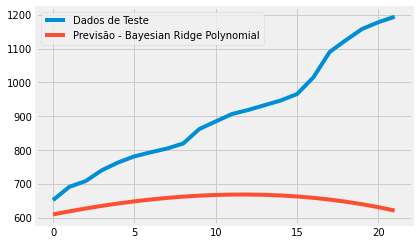

In [ ]:
plt.plot(y_test)
plt.plot(test_bayesian_pred)
plt.legend(['Dados de Teste', 'Previsão - Bayesian Ridge Polynomial'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, '# COVID-19 em Breves-PA')

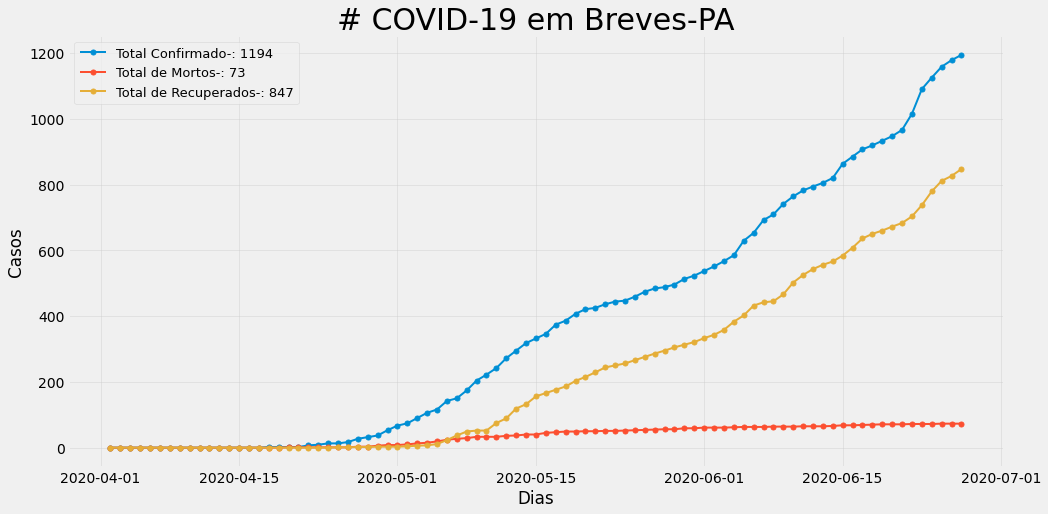

In [ ]:
# Estilo e Tamanho do gráfico
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(13, 6))
eixo1 = fig.add_axes([0.1, 0, 1, 1])
eixo2 = fig.add_axes([0.1, 0, 1, 1])
eixo3 = fig.add_axes([0.1, 0, 1, 1])
eixo1.plot(x_confirmado, y_confirmado,marker='o', markersize=5, linewidth=2, label=f"Total Confirmado-: {y_confirmado[-1]}")
eixo2.plot(x_obito, y_obito,marker='o', markersize=5, linewidth=2, label=f"Total de Mortos-: {y_obito[-1]}")
eixo3.plot(x_Recuperados, y_Recuperados, marker='o', markersize=5, linewidth=2, label=f"Total de Recuperados-: {y_Recuperados[-1]}")
eixo1.grid(True, alpha=.4)
# Labels
eixo1.set_xlabel("Dias")
eixo1.set_ylabel("Casos")
# Legenda
plt.legend(loc = "upper left", prop={"size":13});
plt.title('# COVID-19 em Breves-PA', size=30)
#plt.xlabel('Desde de 02/4/2020', size=30)
#plt.ylabel('# Casos', size=30)
#plt.legend('Casos Confirmados', prop={'size': 20})
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.show()




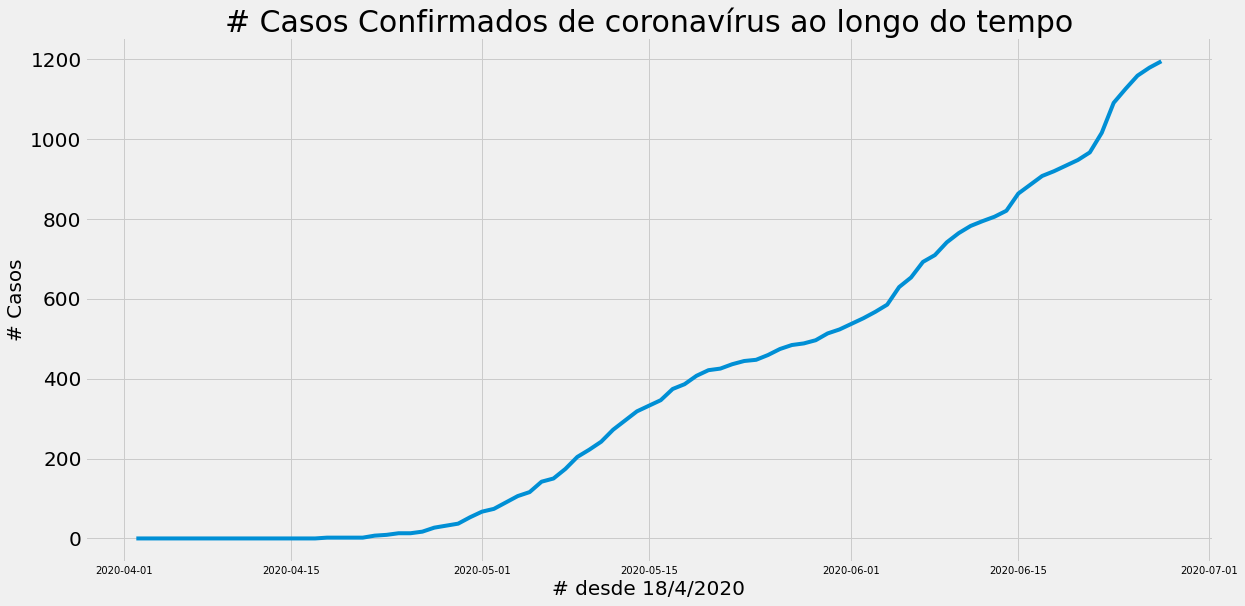

In [ ]:
x = np.arange(len(x_confirmado)).reshape(-1,1)
plt.figure(figsize=(18, 9))
plt.plot(x_confirmado, y_confirmado)
plt.title('# Casos Confirmados de coronavírus ao longo do tempo', size=30)
plt.xlabel('# desde 18/4/2020', size=20)
plt.ylabel('# Casos', size=20)
plt.xticks(size=10)
plt.yticks(size=20)
plt.show()

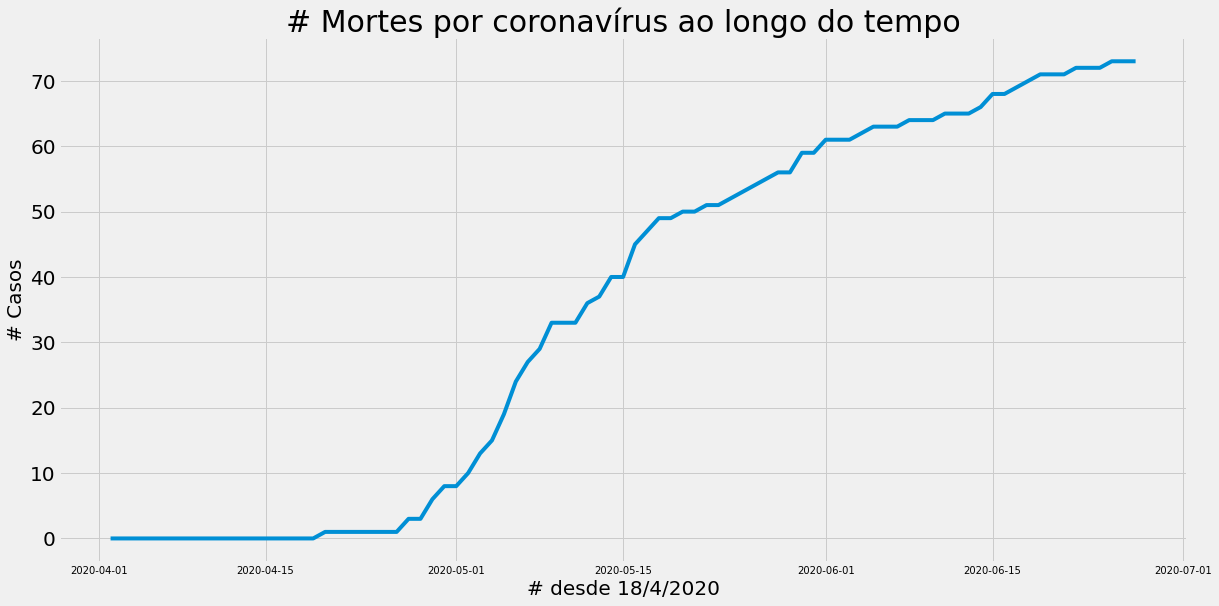

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(x_obito, y_obito)
plt.title('# Mortes por coronavírus ao longo do tempo', size=30)
plt.xlabel('# desde 18/4/2020', size=20)
plt.ylabel('# Casos', size=20)
plt.xticks(size=10)
plt.yticks(size=20)
plt.show()


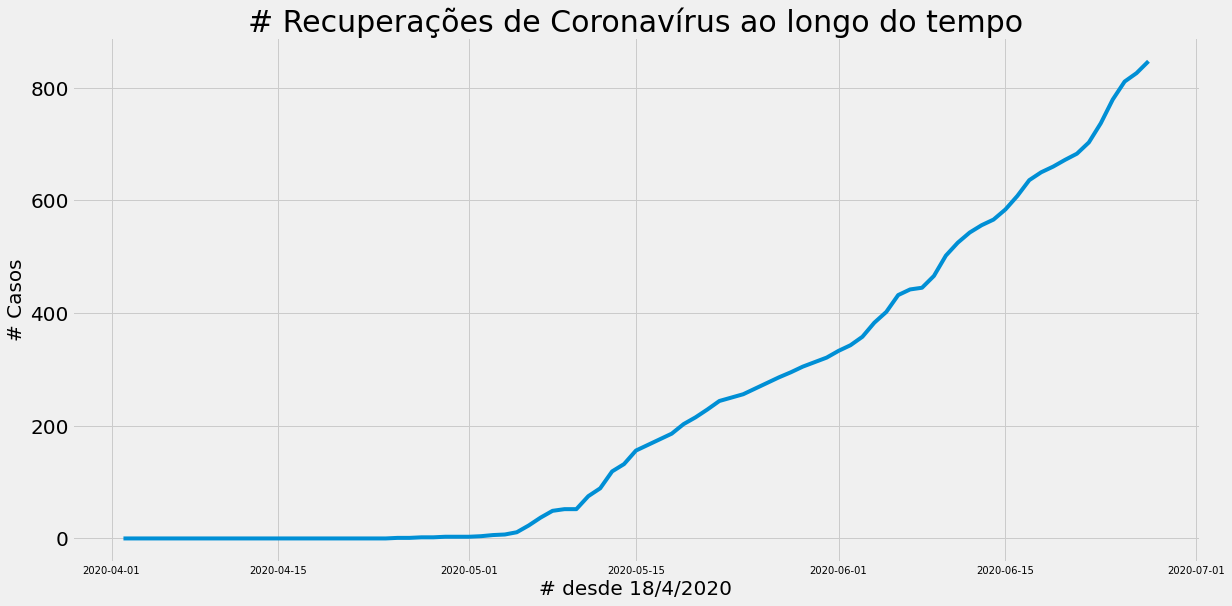

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(x_Recuperados, y_Recuperados)
plt.title('# Recuperações de Coronavírus ao longo do tempo', size=30)
plt.xlabel('# desde 18/4/2020', size=20)
plt.ylabel('# Casos', size=20)
plt.xticks(size=10)
plt.yticks(size=20)
plt.show()

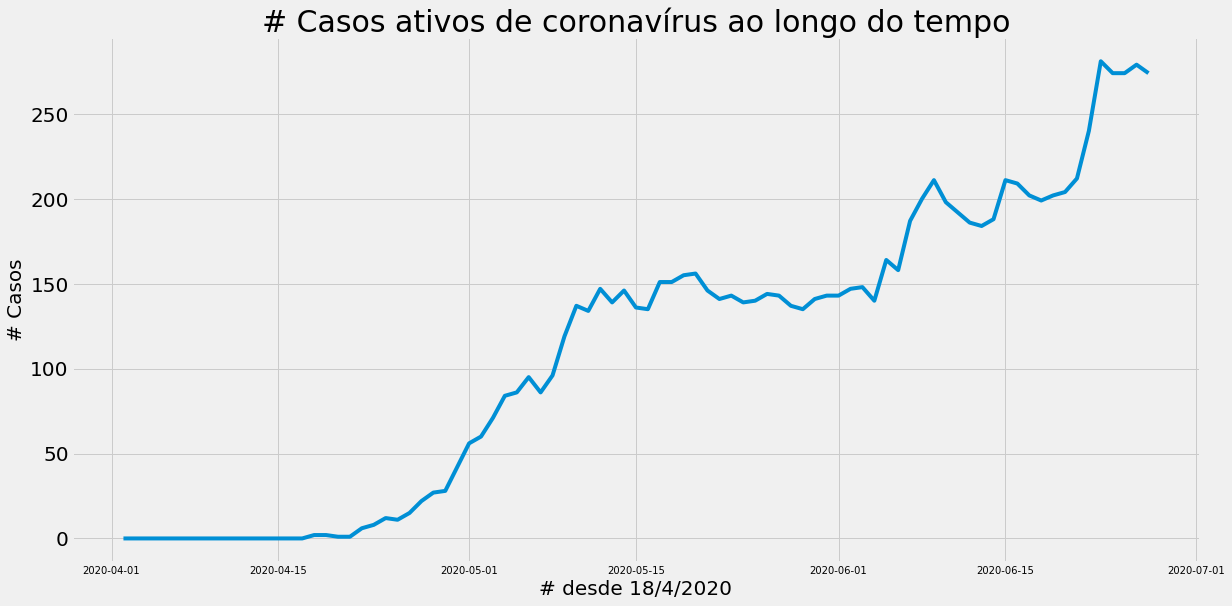

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(x_confirmado, total_ativo)
plt.title('# Casos ativos de coronavírus ao longo do tempo', size=30)
plt.xlabel('# desde 18/4/2020', size=20)
plt.ylabel('# Casos', size=20)
plt.xticks(size=10)
plt.yticks(size=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


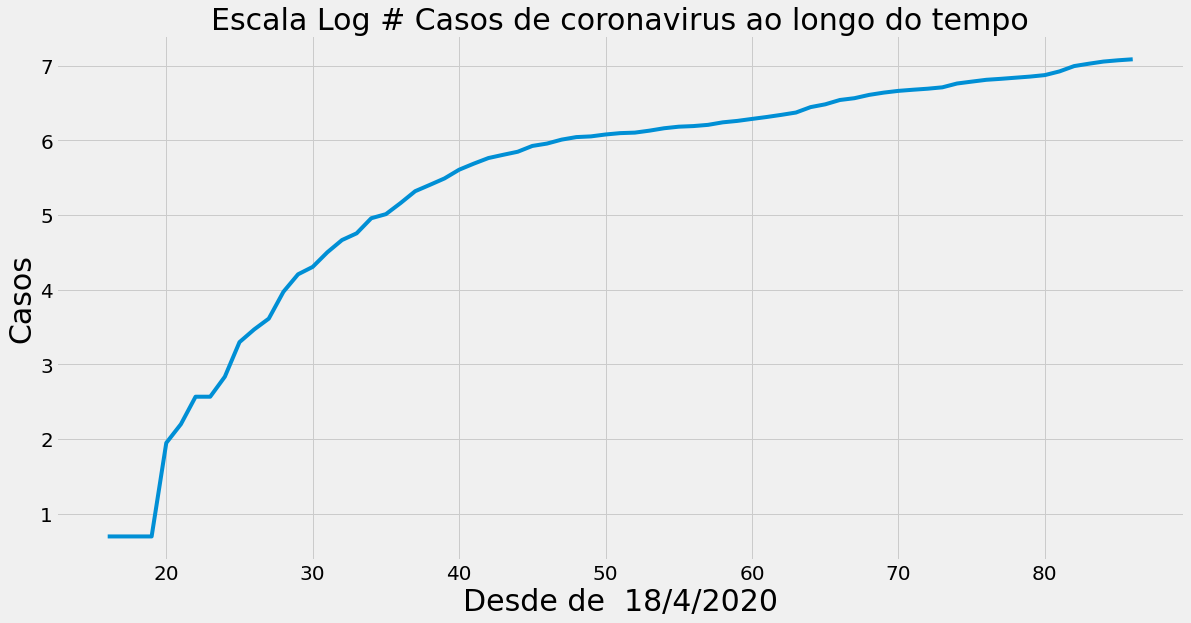

In [ ]:
plt.figure(figsize=(18, 9))
xc = range(0, len(y_confirmado))
plt.plot(xc,np.log(y_confirmado))
plt.title('Escala Log # Casos de coronavirus ao longo do tempo', size=30)
plt.xlabel('Desde de  18/4/2020', size=30)
plt.ylabel('Casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


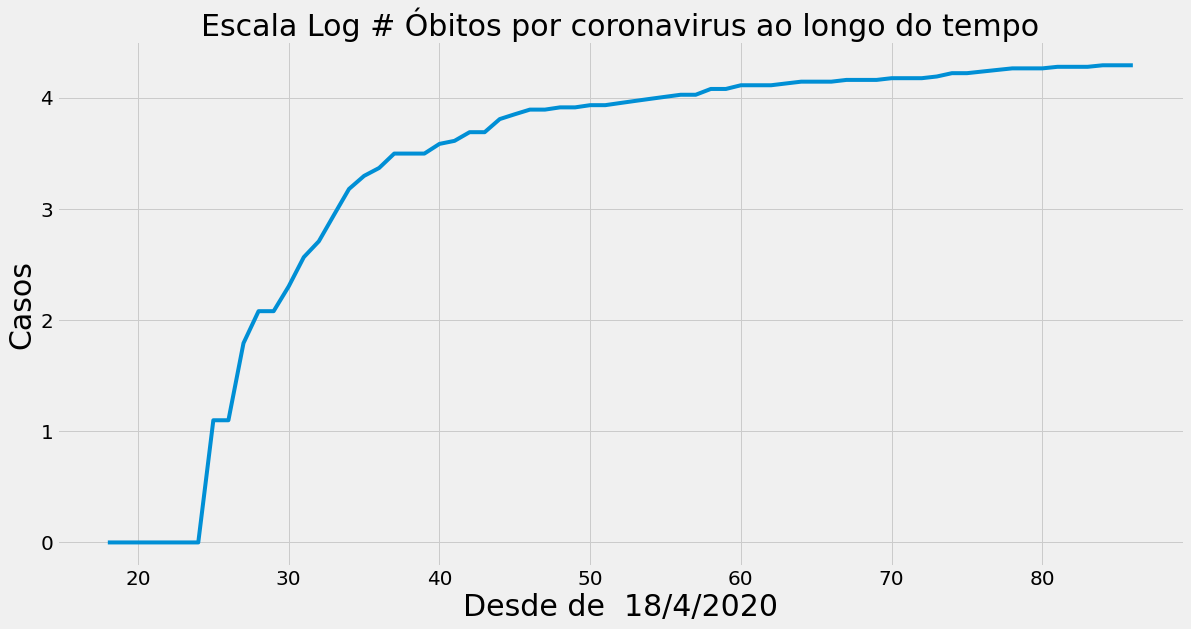

In [ ]:
plt.figure(figsize=(18, 9))
xc = range(0, len(y_obito))
plt.plot(xc,np.log(y_obito))
plt.title('Escala Log # Óbitos por coronavirus ao longo do tempo', size=30)
plt.xlabel('Desde de  18/4/2020', size=30)
plt.ylabel('Casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('# Casos Confirmados de COVID-19 em Breves', size=30)
    plt.xlabel('Desde de 02/4/2020', size=30)
    plt.ylabel('# Casos', size=30)
    plt.legend(['Casos Confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

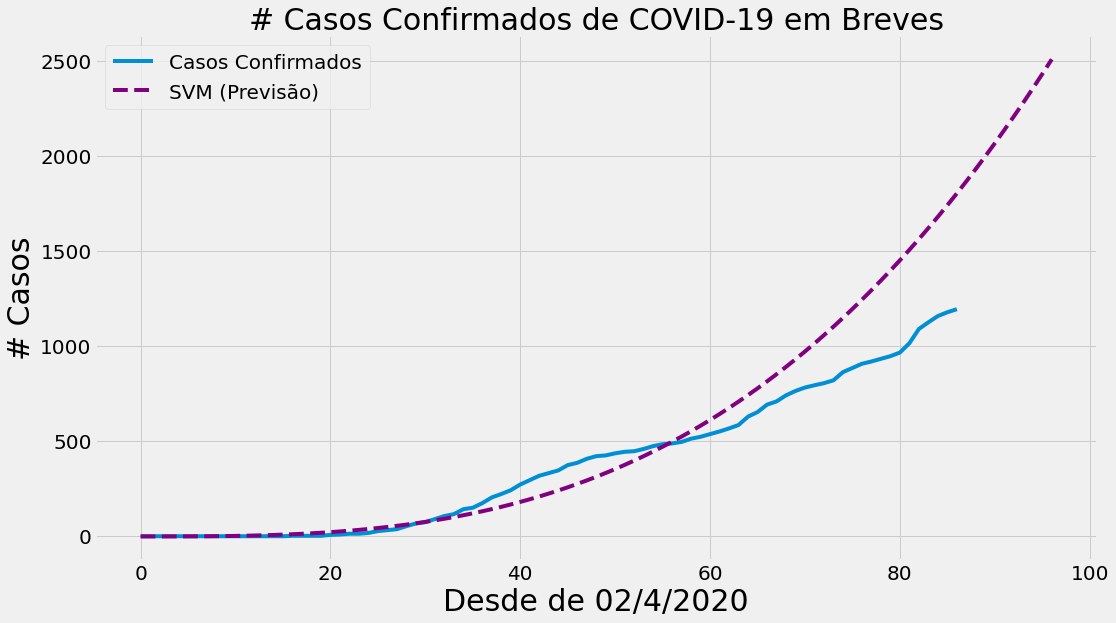

In [ ]:
plot_predictions(x, y_confirmado, svm_pred, 'SVM (Previsão)', 'purple')

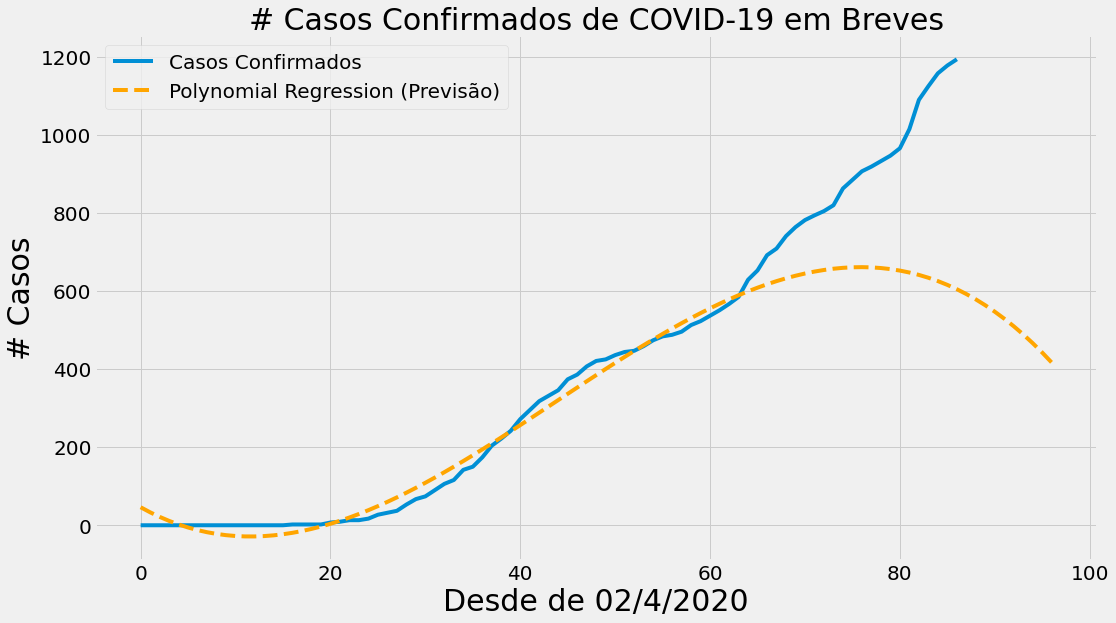

In [ ]:
plot_predictions(x, y_confirmado, linear_pred, 'Polynomial Regression (Previsão)', 'orange')

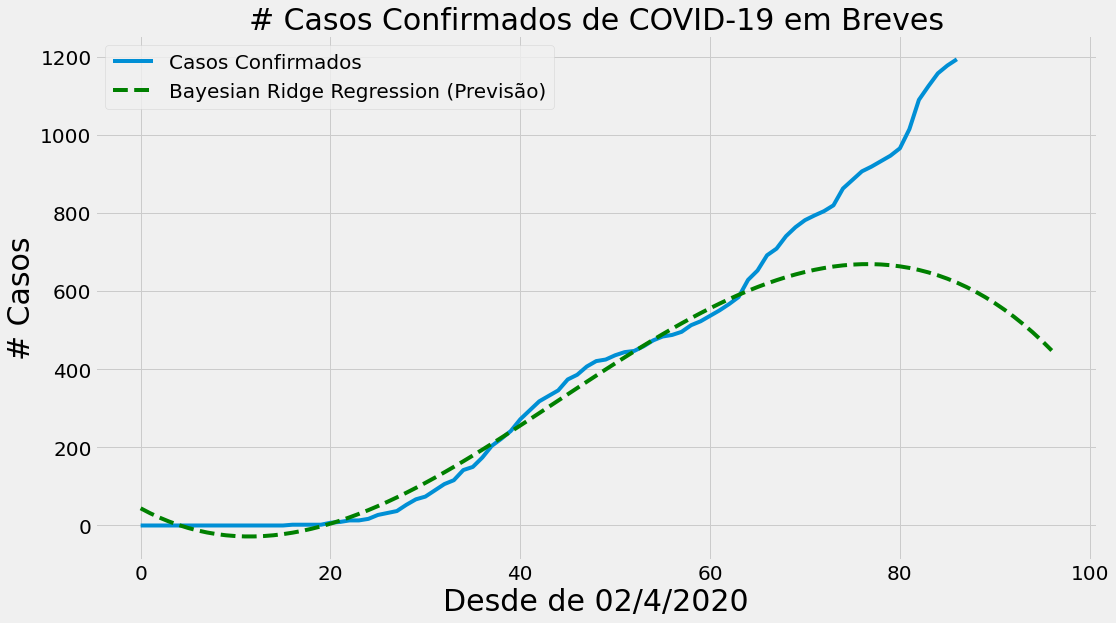

In [ ]:
plot_predictions(x, y_confirmado, bayesian_pred, 'Bayesian Ridge Regression (Previsão)', 'green')

In [ ]:
start = '2/4/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Data': future_forcast_dates[-10:], 'SVM (Previsão) # Casos Confirmados de COVID-19 em Breves': np.round(svm_pred[-10:])})
svm_df

,Data,SVM (Previsão) # Casos Confirmados de COVID-19 em Breves
0,28/06/2020,1867.0
1,29/06/2020,1932.0
2,30/06/2020,1999.0
3,01/07/2020,2067.0
4,02/07/2020,2136.0
5,03/07/2020,2208.0
6,04/07/2020,2280.0
7,05/07/2020,2355.0
8,06/07/2020,2431.0
9,07/07/2020,2508.0


In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
pr_df = pd.DataFrame({'Data': future_forcast_dates[-10:], 'Polynomial (Previsão) # Casos Confirmados de COVID-19 em Breves': np.round(linear_pred[-10:])})
pr_df

,Data,Polynomial (Previsão) # Casos Confirmados de COVID-19 em Breves
0,28/06/2020,592.0
1,29/06/2020,579.0
2,30/06/2020,564.0
3,01/07/2020,547.0
4,02/07/2020,529.0
5,03/07/2020,510.0
6,04/07/2020,489.0
7,05/07/2020,466.0
8,06/07/2020,442.0
9,07/07/2020,417.0


In [ ]:
# Future predictions using Bayesian Ridge 
brr_df = pd.DataFrame({'Data': future_forcast_dates[-10:], 'Bayesian Ridge(Previsão) # Casos Confirmados de COVID-19 em Breves': np.round(bayesian_pred[-10:])})
brr_df

,Data,Bayesian Ridge(Previsão) # Casos Confirmados de COVID-19 em Breves
0,28/06/2020,611.0
1,29/06/2020,598.0
2,30/06/2020,585.0
3,01/07/2020,569.0
4,02/07/2020,553.0
5,03/07/2020,535.0
6,04/07/2020,515.0
7,05/07/2020,495.0
8,06/07/2020,472.0
9,07/07/2020,448.0


# PREDIÇÃO - MODELOS: 
## 1 - Support Vector Machime (SVM)
## 2 - Polinomial Regression (PR) 
## 3 - Baeysian Ridge Regression (BRR)

In [ ]:
# Future predictions using SVM 
print('Previsão para Casos Confirmados por COVID-19 em Breves-PA')
tabela_models_df = pd.DataFrame({'Data': future_forcast_dates[-10:], 'SVM': np.round(svm_pred[-10:]),'Polynomial': np.round(linear_pred[-10:]),'Baeysian Ridge Regression': np.round(bayesian_pred[-10:])})
tabela_models_df

Previsão para Casos Confirmados por COVID-19 em Breves-PA


,Data,SVM,Polynomial,Baeysian Ridge Regression
0,28/06/2020,1867.0,592.0,611.0
1,29/06/2020,1932.0,579.0,598.0
2,30/06/2020,1999.0,564.0,585.0
3,01/07/2020,2067.0,547.0,569.0
4,02/07/2020,2136.0,529.0,553.0
5,03/07/2020,2208.0,510.0,535.0
6,04/07/2020,2280.0,489.0,515.0
7,05/07/2020,2355.0,466.0,495.0
8,06/07/2020,2431.0,442.0,472.0
9,07/07/2020,2508.0,417.0,448.0


# TAXA DE LETALIDADE POR COVID-19 EM BREVES

##Total de Óbitos - TO
##Total de Confirmados - TC
##Taxa de Letalidade - TL

$TL = \frac{TO}{TC}*100$

In [ ]:
print("Taxa de Letalidade do COVID-19 em Breves")
print(f"{(y_obito[-1]/y_confirmado[-1]) * 100:.2f}%")

Taxa de Letalidade do COVID-19 em Breves
6.11%


# MODELO PRONTO PARA USO

In [ ]:
# importa pacote que salva o modelo treinado para ser usado posteriormente
##import pickle

In [ ]:
##filename ='V1_COVID19_BREVES.pickle'

In [ ]:
##pickle.dump(svm_confirmado ,open(filename,'wb'))


In [ ]:
# carrega o modelo
##load_model = pickle.load(open(filename,'rb'))

In [ ]:
##load_model.predict([[46]])

In [ ]:
datapred=[svm_pred,linear_pred,bayesian_pred]

In [ ]:
#df_breves_teste=pd.read_excel('/content/Dadosteste1_Breves_COVID19.xlsx')

In [ ]:
df_breves_teste.head()

In [ ]:
x_confirmado_teste = df_breves_teste.groupby("Dia")["Confirmados"].sum().index
y_confirmado_teste = df_breves_teste.groupby("Dia")["Confirmados"].sum().values

In [ ]:
y2 = np.array(y_confirmado_teste).reshape(-1,1)
x2 = np.arange(len(x_confirmado_teste)).reshape(-1,1)

In [ ]:
y2

In [ ]:
plt.plot(x2,y2)
plt.plot(svm_pred[-10:])